In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from MolNexTR.chemical import convert_graph_to_smiles, postprocess_smiles, keep_main_molecule
from IPython.display import SVG

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Gound Truch and Prediction

In [2]:
BASE = '../data/'
ignore_chiral = False

data = pd.read_csv('../your_data')
pred = pd.read_csv('../your_prediction')


# Visualization 

--------------------
1
0
real/mechanism/acs.orglett.5b00776-Scheme-c5.png
gold: *N=NC(*)C(C(=O)O[2*])C(*)=NN*
post: C(*)(C(C([1*])=[N+]N*)C(*)([H])[n+]=N*)=O
grph: n>
pred: C([OR2])(C(/C(/[R1])=[N+]/N[X])C([Ar2])([H])[n+]=N[Ar4])=O
post1: C([OR2])(C(/C(/[R1])=[N+]/N[X])C([Ar2])([H])[n+]=N[Ar4])=O
(474, 464, 3)
384


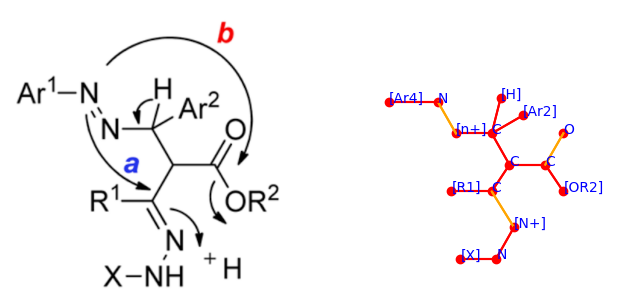

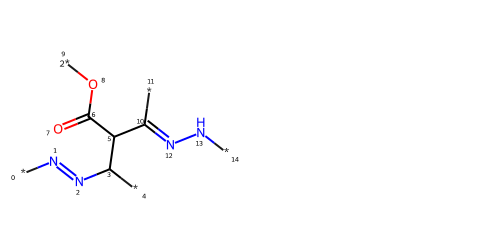

--------------------
2
1
real/mechanism/jo962200s-Scheme-c3.png
gold: *C1=C(N)N(C)C(=O)CN(C)C1=O.CN1CC(=O)N(C)C(=O)C(=CN2CCOCCN2)C1=N
post: *C1=C(N)*C(=O)*C1=O.N=C1NC(=O)*C(=O)C1=CN1CCOCC1
grph: n>
pred: [MeN]1C(=O)NC(=N)C(C1=O)=CN1CCOCC1.[MeN]1C([NMe]C(C([CHS])=C1N)=O)=O
post1: [MeN]1C(=O)NC(=N)C(C1=O)=CN1CCOCC1.[MeN]1C([NMe]C(C([CHS])=C1N)=O)=O
(624, 1034, 3)
384


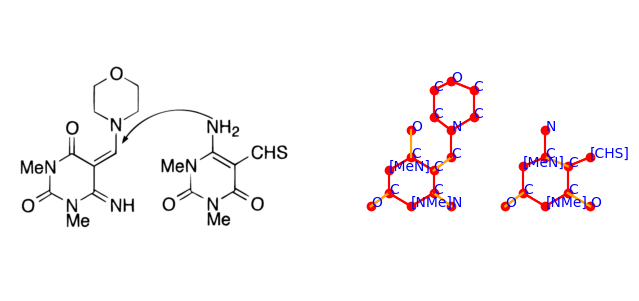

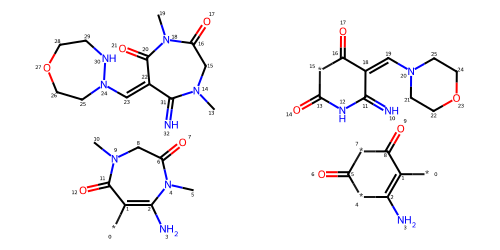

--------------------
3
2
real/mechanism/acs.orglett.5b01872-Scheme-c1.png
gold: *.*.C=C[Sn].Nc1nc(CCl)c(Br)nc1Br
post: C=C[Sn][c][c](Cl)N=C(N)C(Br)=NC(Br)=C(Cl)N=C(N)C(Br)=NC=1Br.*
grph: n>
pred: C=C[Sn][c][c](Cl)N=C(N)C(Br)=NC(Br)=C(Cl)N=C(N)C(Br)=NC=1Br.[ZnB]
post1: C=C[Sn][c][c](Cl)N=C(N)C(Br)=NC(Br)=C(Cl)N=C(N)C(Br)=NC=1Br.[ZnB]
(402, 796, 3)
384


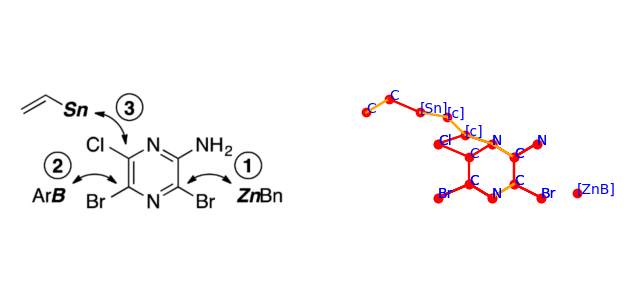

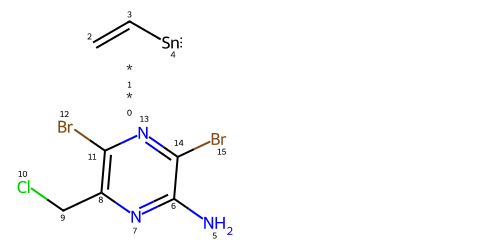

--------------------
4
3
real/mechanism/ja012253d-Scheme-c3.png
gold: *C1(O)CC=NC(=O)N1.*c1cnc[nH]1
post: *C1(O)CNC(=O)N1.*c1cnc[nH]1
grph: n>
pred: C1NC(=O)NC1([R])O.C1([R])NC=NC=1
post1: *C1(O)CNC(=O)N1.*c1cnc[nH]1
(300, 806, 3)
384


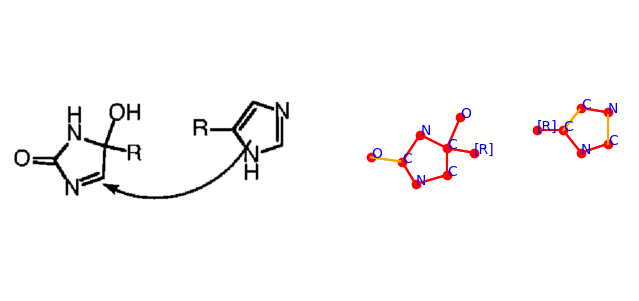

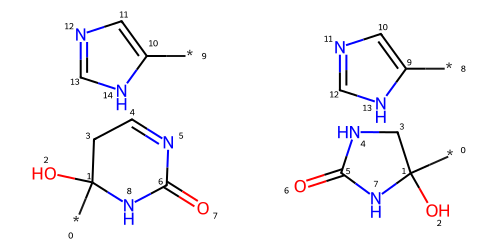

--------------------
5
4
real/mechanism/jo000081h-Figure-c4.png
gold: *C(C)C1CCC2(C)CC=C(C)CCC=C(C)CCC12
post: *C(C)C1CCC2(C)CC=C(C)CCC=C(C)CCC12
grph: n>
pred: C/C1=C/CC/C(C)=C/CC2(C)CCC(C(C)[R])C2CC1
post1: *C(C)C1CCC2(C)C/C=C(\C)CC/C=C(\C)CCC12
(248, 358, 3)
384


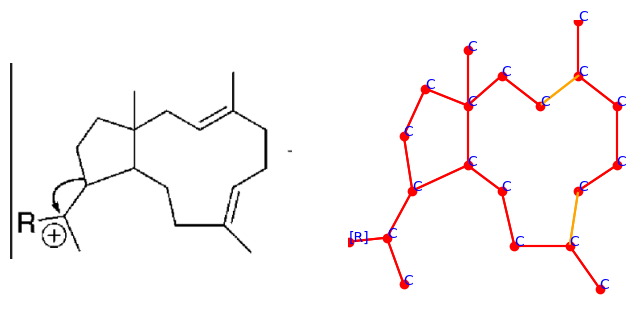

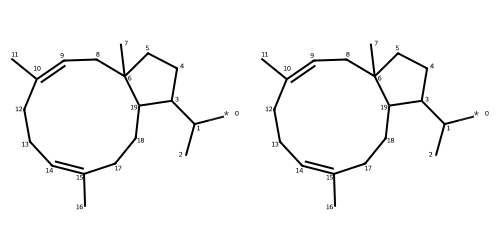

--------------------
6
5
real/mechanism/ol010283f-Scheme-c2.png
gold: *C=[O+]CC(=O)C(*)C(=O)O*
post: *OC(=O)C(*)C(=O)C[O+]=C[Ar]
grph: *OC(=O)C(*)C(=O)C[O+]=C[Ar].*OC(=O)C(*)C(=O)C[O+]=C[Ar]
pred: [H]C([Ru(Por)])(C([OR])=O)C(=O)C/[O+]=C/[Ar].[H]C([Ru(Por)])(C([OR])=O)C(=O)C/[O+]=C/[Ar]
post1: *OC(=O)C(*)([H])C(=O)C/[O+]=C/[Ar]
(244, 574, 3)
384


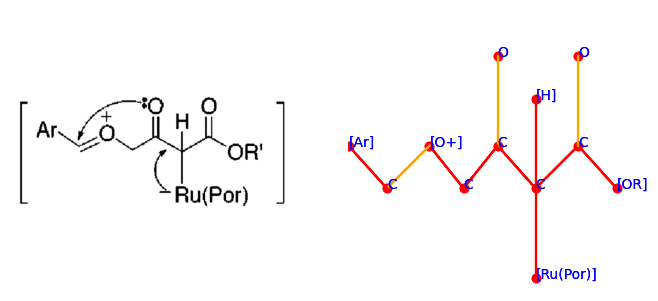

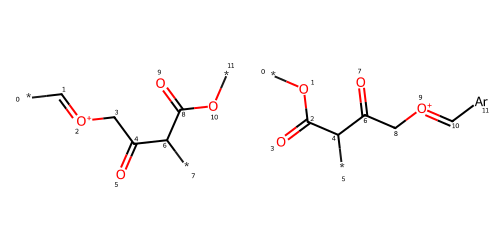

--------------------
7
6
real/mechanism/ol202027k-Scheme-c2.png
gold: C=C([O-])OC(C)=O.CC(=O)[n+]1ccccc1
post: C=C([O-])OC(C)=O.CC(=O)[n+]1ccccc1
grph: n>
pred: [0].[.].C=C([O-])OC(C)=O.CC(=O)[N+]1=CC=CC=C1
post1: C=C([O-])OC(C)=O.CC(=O)[N+]1=CC=CC=C1
(348, 584, 3)
384


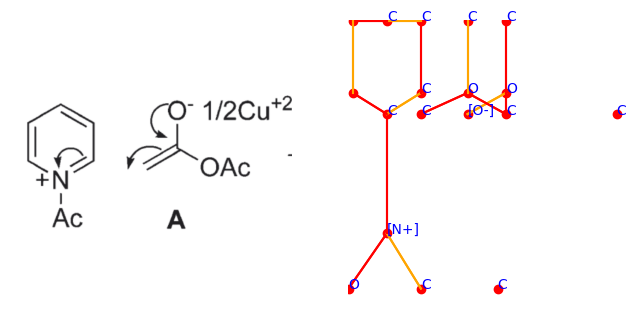

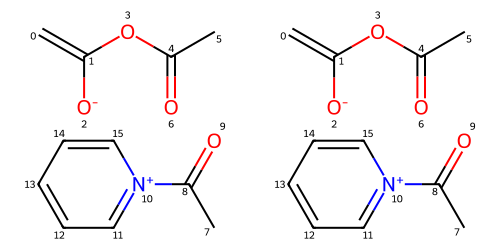

--------------------
8
7
real/mechanism/ol503708v-Scheme-c4.png
gold: C=C1[C@@H](N=C=S)C=C[C@H](O)[C@@H]1O
post: C=C1[C@@H](N=C=S)C=C[C@H](O)[C@@H]1O
grph: C=C1[C@@H](N=C=S)C=C[C@H](O)[C@@H]1O
pred: C=C1[C@@H](N=C=S)C=C[C@H](O)[C@@H]1O
post1: C=C1[C@@H](N=C=S)C=C[C@H](O)[C@@H]1O
(236, 298, 3)
384


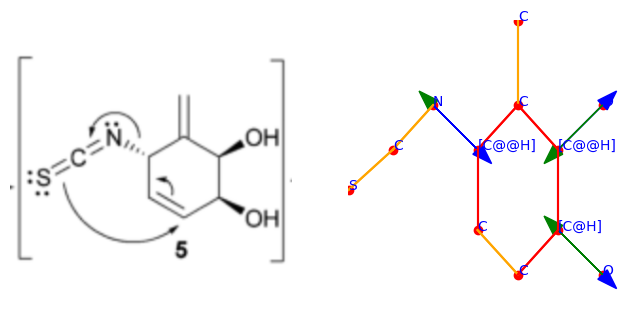

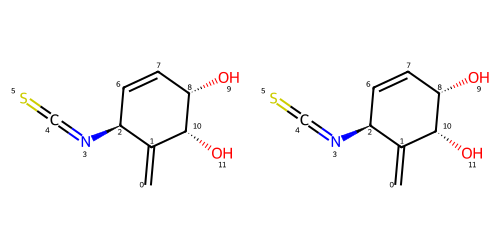

--------------------
9
8
real/mechanism/op020019h-Figure-c1.png
gold: O=CCCOc1ccc([N+](=O)[O-])cc1
post: O=CCCOc1ccc([N+](=O)[O-])cc1
grph: O=CCCOc1ccc([N+](=O)[O-])cc1
pred: C1C(OCC([H])C([H])=O)=CC=C([NO2])C=1
post1: [H]C(=O)C([H])COc1ccc([N+](=O)[O-])cc1
(304, 568, 3)
384


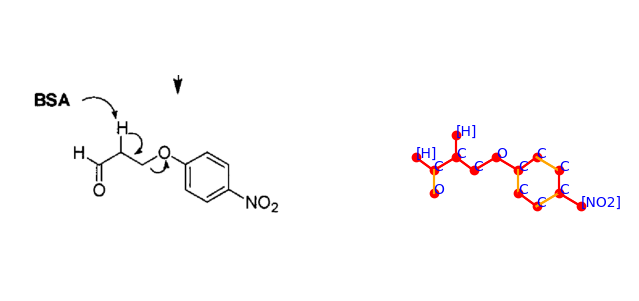

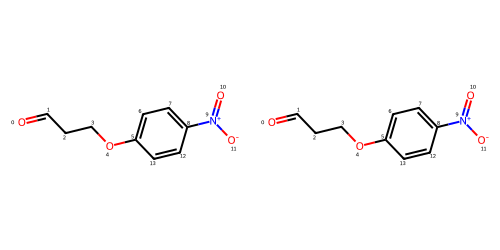

--------------------
10
9
real/mechanism/op200112g-Scheme-c8.png
gold: COCOC.ClC=[O+][Zn+2]
post: CC(Cl)=[O+][Zn+2].COCOC
grph: n>
pred: C/C(Cl)=[O-]\[Zn+2].COCOC
post1: C/C(Cl)=[O+]\[Zn+2].COCOC
(370, 984, 3)
384


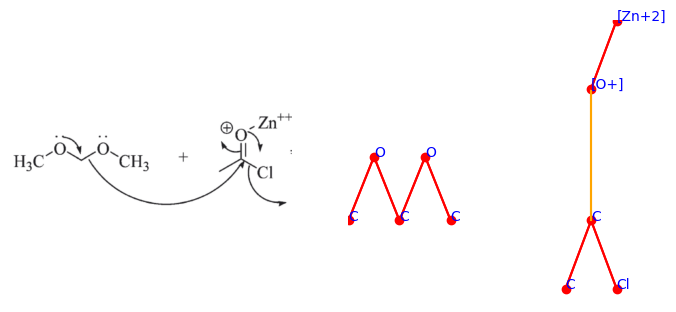

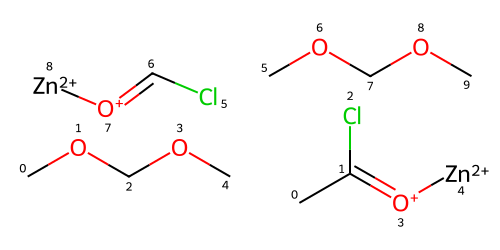

In [3]:
import sys
sys.path.append('../')
from MolNexTR.chemical import _postprocess_smiles, _convert_graph_to_smiles
from MolNexTR.evaluation import canonicalize_smiles
from MolNexTR.data_aug import CropWhite ,PadToSquare
import albumentations as A
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 600,600

transform = A.Compose([CropWhite(pad=50),PadToSquare(p=1), A.Resize(384,384)])
cnt = 0 
for idx, row in data.iterrows():
    gold_smiles,_ = canonicalize_smiles(row['SMILES'], ignore_cistrans=True, ignore_chiral=ignore_chiral)
    pred_smiles = pred.loc[idx,'SMILES']
    pred_smiles1 = pred.loc[idx,'post_SMILES']
    post_smiles,_ = canonicalize_smiles(pred.loc[idx,'post_SMILES'], ignore_cistrans=True, ignore_chiral=ignore_chiral)
    graph_smiles,_ = canonicalize_smiles(pred.loc[idx,'graph_SMILES'], ignore_cistrans=True, ignore_chiral=ignore_chiral)
    #if gold_smiles == post_smiles:
       # continue
    print('-' * 20)
    cnt += 1

    print (cnt)
    print(idx)
    print(row['file_path'])
    print('gold:', gold_smiles)
    print('post:', post_smiles)
    print('grph:', graph_smiles)
    print('pred:', pred_smiles)
    print('post1:', pred_smiles1)
    file = str(row['file_path'])
    path = BASE + file
    image = cv2.imread(path)
    print(image.shape)
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.axis('off')
    img = transform(image=image)['image']
    plt.imshow(img,alpha=0)
    if 'node_coords' in pred.columns:
        coords = np.array(eval(pred.loc[idx, 'node_coords']))
        symbols = eval(pred.loc[idx, 'node_symbols'])
        edges = eval(pred.loc[idx, 'edges'])
        h, w, _ = img.shape
        print(h)
        x, y = coords[:,0]*w, coords[:,1]*h
        plt.scatter(x, y, color='r', marker='o')
        for i in range(len(symbols)):
            plt.text(x[i], y[i], symbols[i], color='blue')
        for i in range(len(x)):
            for j in range(len(x)):
                if edges[i][j] != 0:
                    if edges[i][j] in [5, 6]:
                        color = 'blue' if edges[i][j] == 5 else 'green'#6#虚线
                        plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=20)
                    else:
                        color = 'red' if edges[i][j] == 1 else 'orange'
                        plt.plot([x[i], x[j]], [y[i], y[j]], color)
    plt.show()
    mol1 = Chem.MolFromSmiles(gold_smiles)
    mol2 = Chem.MolFromSmiles(post_smiles)
    svg = Draw.MolsToGridImage([mol1, mol2], subImgSize=(250,250), molsPerRow=2, useSVG=True)
    display(svg)
    if cnt == 100:
        break